<h1 style="color:blue"> Praktikum 6.</h1>
<h3 style="color:blue">JSON andmeformaat, märgendatud tekstide salvestamine ja taastamine, <br> ajaväljendite tuvastamine ja visualiseerimine</h3>

Käesolevas praktikumis tutvume JSON andmeformaadiga ja vaatame, kuidas selles formaadis andmeid (sh EstNLTK märgendustega tekste) salvestada/taastada, keeletöötluse poolel aga tegeleme ajaväljendite tuvastamisega ning joonistame ajaväljenditele vastavate kuupäevade kohta tulpdiagramme.

## JSON andmeformaat

Neljandas praktikumis tutvusime CSV andmeformaadiga. CSV sobib hästi tabelkujul andmete salvestamiseks, aga pole just kuigi mugav kasutada, kui meie andmed on hierarhilise struktuuriga. 

Näiteks, milline tabel tuleks teha, kui eesmärk oleks salvestada tabelisse EstNLTK `Text` ning selle märgenduskihid: lausepiirid, sõnapiirid, sõnade morfoloogilised analüüsid ja tekstist tuvastatud nimeüksuste fraasid?
Selleks, et kogu see informatsioon ilma kadudeta tabelisse salvestada, tuleks luua võrdlemisi keerukas andmete teisendamise süsteem ja võimalik, et ei piisakski ühest tabelist, vaid tuleks teha mitu. Märksa parem oleks aga, kui saaksime keeruka süsteemi loomise asemel lihtsalt kasutada sama sõnastik-andmestruktuuri, mida kasutab EstNLTK `Text`. Ja seda võimaldabki JSON.

JSON sai algselt populaarseks veebis andmete vahetamise formaadina, hiljem aga muutus tavaliseks ka andmete lokaalsel talletamisel. Tänu tekstilisele vormingule on JSON hõlpsalt loetav ja kirjutatav nii arvutite kui ka inimeste poolt. Nii nagu CSV, nii on ka JSON formaat täielikult platvormist sõltumatu, seega võib andmed kirjutada näiteks Windows-is ja hiljem lugeda Linux-is.

JSON-is esitatakse andmed objektidena, mis pannakse kokku kaht liiki struktuuridest:

 * _Võti-väärtus_ paarid, kus võti on alati sõne ja väärtus võib olla sõne, arv, tõeväärtus (`true/false`), järjend või mõni JSON objekt. Süntaksi poolest on see väga sarnane Pythoni sõnastikule. Näide:
       {
         "nimi": "Juku",
         "vanus": 15
       }
 * _Järjendid_, mille elementideks võivad olla sõned, arvud, tõeväärtused või JSON objektid. Jällegi, süntaksilt sarnane Pythoni listile. Näide: 
       {
         "nimi": "Juku",
         "vanus": 15,
         "vanemad" : [
             {  
               "nimi": "Juhan",
               "vanus": 40
             },
             {  
               "nimi": "Pille",
               "vanus": 37
             }
         ]
       }
   Eelmises näites: võtmele `"vanemad"` vastavaks väärtuseks on järjend (`[]`-vahel), mis koosneb omakorda JSON objektidest.

Neid kaht liiki struktuuriliiki kombineerides võib moodustada kuitahes keerukaid või sügavaid andmestruktuure, mingit otsest piirangut siin ei ole (v.a loomulikud piirangud, mis tulenevad arvuti mälu- / kõvakettamahust).

Muide, ka _Jupyter Notebook_-i `.ipynb` failid on JSON formaadis, seega saate neid avada ka täiesti tavalise tekstiredaktoriga ning vajadusel teha kiireid parandusi ilma, et peaksite _Notebook_-i käivitama. **(!)** Siiski ka hoiatus: kui muudate `.ipynb` faili käsitsi, peate olema väga tähelepanelik selle suhtes, et säiliks algne faili formaat -- kui teete formaadi katki, ei lähe märkmikufail enam _Notebook_-is käima...

### Python ja JSON

Praktiliselt iga Pythoni sõnastiku, mille võtmeteks on sõned ning väärtused on sõned, arvud, tõeväärtused, järjendid või sõnastikud, võib teisendada JSON kujule. Seda saab teha teegi `json` abil:

In [1]:
import json

my_hierarchical_data = {'nimi':'Elvis','lemmikloomad':[{'nimi':'Pontu','liik':'koer'},{'nimi':'Jõnksu','liik':'küülik'}]}

# Teisendame sõnastiku JSON kujul sõneks
json_string = json.dumps( my_hierarchical_data )

print(json_string)

{"nimi": "Elvis", "lemmikloomad": [{"liik": "koer", "nimi": "Pontu"}, {"liik": "k\u00fc\u00fclik", "nimi": "J\u00f5nksu"}]}


Mis muutus pärast JSON-iks konverteerimist? Esiteks, kõik sõned on nüüd `"`-sümbolite, mitte enam `'`-sümbolite vahel. Erinevalt Pythonist lubataksegi JSON-is ainult jutumärkide vahel olevaid sõnesid. Ning teiseks, täpitähtede asemele ilmusid sõnedesse veidrad sümbolite jadad. Põhjus selles, et vaikimisi lubab meetod `dumps` sõnede sees kasutada ainult [ASCII sümboleid](http://ascii-table.com) ning kõik muud sümbolid kodeeritakse. Seda sätet saab siiski ka muuta -- kui käivitate meetodi lipuga `ensure_ascii=False`, siis jäävad _Unicode_ sümbolid alles nende algsel kujul.

Andmete tagasiteisendamiseks sõne kujult Pythoni andmestruktuuriks saame kasutada meetodit `json.loads`:

In [2]:
# Teisendame JSON kujul andmed tagasi Pythoni sõnastikuks
my_new_hierarchical_data = json.loads(json_string)

print(my_new_hierarchical_data)

{'nimi': 'Elvis', 'lemmikloomad': [{'liik': 'koer', 'nimi': 'Pontu'}, {'liik': 'küülik', 'nimi': 'Jõnksu'}]}


#### JSON andmete "kaunistrükk"

Hierarhilist struktuuri võib olla keerukas jälgida, kui kogu andmestruktuur on surutud kokku ühele reale. Et andmete struktuur oleks kergemini jälgitav, selleks trükitakse andmed sageli välja nii, et iga element on eraldi real ning hierarhia järgmise taseme liikmed on eelmise taseme liikmetest eristatud taanete abil. Ka JSON sõnede loomisel võib nõuda, et erinevate tasemete liikmed oleksid eristatud taanete abil:

In [3]:
# Teisendame sõnastiku JSON kujul sõneks ning nõuame, et taane oleks 3 tühikut
json_string = json.dumps( my_hierarchical_data, indent = 3 )

print(json_string)

{
   "nimi": "Elvis",
   "lemmikloomad": [
      {
         "liik": "koer",
         "nimi": "Pontu"
      },
      {
         "liik": "k\u00fc\u00fclik",
         "nimi": "J\u00f5nksu"
      }
   ]
}


Andmete sisselugemise seisukohalt vahet pole, kas andmed on taandega või ilma -- meetod `loads` oskab lugeda mõlemal kujul andmeid. Küll aga on taandega JSON-andmete miinuseks see, et need võtavad (mälus / kõvakettal) rohkem ruumi ja seega praktikas (andmete vahetamisel / salvestamisel) kasutatakse taanetega kuju harvem.

Ka Pythoni enda andmestruktuure võib väljastada ekraanile taanetega. Selle jaoks on standardteegis nn "kaunistrüki" (ingl _pretty-printing_) meetod [`pprint`](https://docs.python.org/3.5/library/pprint.html):

In [4]:
from pprint import pprint

pprint(my_hierarchical_data)

{'lemmikloomad': [{'liik': 'koer', 'nimi': 'Pontu'},
                  {'liik': 'küülik', 'nimi': 'Jõnksu'}],
 'nimi': 'Elvis'}


Lisaks kulub see meetod marjaks ära nt siis, kui tahame printida EstNLTK `Text` objekti sõnastiku-sisu -- vaikimisi prinditakse `Text` objekti puhul ainult ilma märgenduseta tekst, `pprint` abil saab aga väljastada kogu sõnastiku. Mis puutub _Jupyter Notebook_-i, siis siia on juba sisse ehitatud mugavus, et kui kirjutada koodilahtrisse ainult `Text` objekt või seda sisaldava muutuja nimi, siis väljastatakse sõnastiku sisu. 
Käsureaprogrammides `Text` objekti printides aga nii ei juhtu ning seal on `pprint` mugavaim viis `Text` objekti taga oleva sõnastiku väljastamiseks/uurimiseks.

Katsetage: looge üks `Text` objekt, lisage sellele märgendust ja printige selle sisu `pprint` abil.

#### JSON andmete salvestamine faili / lugemine failist

Kui andmed on konverteeritud JSON sõneks, siis võib need salvestada faili samal viisil, nagu salvestatakse tavalisi tekstiandmeid. Analoogselt: JSON failist võib andmed algul lugeda sisse sõnena ning seejärel teisendada `json.loads` abil Pythoni andmeteks. Lisaks sellele on teegis `json` meetodid [`dump`](https://docs.python.org/3.5/library/json.html#json.dump) ja [`load`](https://docs.python.org/3.5/library/json.html#json.load), mida saab kasutada vahetult faili kirjutamiseks / failist lugemiseks. Näide: faili kirjutamine:

In [5]:
with open('minu_andmed.json', 'w') as f:
    # Teisendame andmed JSON kujule ja kirjutame faili f
    json.dump( my_hierarchical_data, f )

Mis puutub aga EstNLTK `Text` objektidesse, siis nende salvestamiseks kõvakettale on samuti JSON kõige loomulikum kuju, ning EstNLTK sisaldab ka funktsioone, mis teevad failioperatsioonid veelgi mugavamaks. Järgmisena uurimegi neid.

### Estnltk ja JSON

Moodul `estnltk.corpus` sisaldab funktsioone, mis võimaldavad `Text` objekte salvestada \ laadida JSON failide kujul:

   - `read_document(fnm)` -- loeb tekstifalist nimega `fnm` JSON kujul teksti ning tagastab vastava `Text` objekti. Eeldab, et tekst on kodeeritud baidimassiiviks ning hõlmab kogu tekstifaili (ehk: kogu faili sisu moodustab ühe JSON objekti); 


   - `write_document(doc, fnm)` -- konverteerib `Text` objekti `doc` JSON kujule (sõne kodeeritakse baidimassiiviks), ning kirjutab tekstifaili nimega `fnm`; 


   - `read_json_corpus(fnm)` -- loeb tekstifalist nimega `fnm` JSON kujul tekstide korpuse ning tagastab `Text` objektide järjendina. Eeldab, et igal faili real on üks korpuse tekst ja iga tekst on JSON kujul ning baidimassiiviks kodeeritud sõnena; 


   - `write_json_corpus(documents, fnm)` -- konverteerib `Text` objektid järjendis `documents` JSON kujule (ja baidimassiivideks kodeeritud sõnedeks) ning kirjutab faili nimega `fnm`, iga tekst eraldi reale;

Sisuliselt salvestatakse faili kogu `Text` sisu, mida näeb `pprint` abil objekti välja trükkides -- ehk siis tekst koos selle märgendustega. Salvestamata jäävad parameetrid, mis antakse `Text` objektile loomisel kaasa (nt lipud `'disambiguate'` ja `'guess'`), seega, kui on oluline jäädvustada ka parameetrite seis, tuleks need eraldi `Text`-i võtmeteks panna.

### Ülesanne 1. JSON korpuse lugemine ja kirjutamine (1,5 p)

Looge skript, mis teeb järgmist: 
   1. loeb kaustast 'aja_json' JSON kujul tekstid (ajaleheartiklid Postimehest ja EPL-ist); 
   2. moodustab nende põhjal `Text` objektid ning lisab tekstidele morfoloogilised analüüsid;
   3. salvestab tulemused JSON kujul korpustena, selliselt, et ühel päeval ilmunud artiklid koondatakse salvestatamisel ühte faili;
   4. väljastab statistikat iga ilmumiskuupäeva kohta: millises ajalehes ilmusid millistesse rubriikidesse kuuluvad artiklid? Leidude põhjal moodustatakse ülevaatlik tabel (`pandas.DataFrame` abil), mille reanimedeks on kuupäevad, veerunimedeks on ajalehenimetused ning lahtrites on loetletud vastaval kuupäeval vastavas ajalehes esinenud rubriikide nimed:


- | EPL | Postimees
--- | --- | --- 
**_kuupäev1_** | _rubriik1_, _rubriik2_, ... | _rubriik1_, ... 
**_kuupäev2_** | _rubriik3_, ... | ...
... | ... | ...


 ( kui mingil kuupäeval mingis ajalehes ühtegi artiklit ei ilmunud, jääb vastav tabeli lahter tühjaks )

Detailid / vihjed: 
   - kasutage funktsiooni `estnltk.corpus.read_document(fnm)` artikli-failide sisselugemiseks;
   - _metaandmed_: informatsioon artikli kohta (ilmumiskuupäev, rubriik, aga ka pealkiri ja autor) on talletatud `Text` objekti võtmetes: uurige, millised võtmed/väärtused on sisseloetud `Text` objektidel (Vihje: kasutage meetodit `.keys()` sõnastiku võtmete kättesaamiseks);
   - kasutage meetodit `estnltk.corpus.write_json_corpus(documents, fnm)` uue märgendusega tekstide salvestamiseks; uute failide nimedes peaksid kajastuma ka artiklite loomise kuupäevad;
        - NB! järgmiste ülesannete lahendamise seisukohalt on väga soovitav kasutada failinimedes ühes kindlas formaadis kuupäevi, isegi kui metaandmetes kasutatakse erinevaid kuupäevaformaate (nt `'yyyy.mm.dd'` ja `'dd.mm.yyyy'`);
   - Tabeli tegemine: 1) mitmemõõtmelisest järjendist; siis muutub oluliseks küsimus, kuidas muuta `pandas.DataFrame`-is ridade ja veergude nimesid? [vt seda abimaterjali](https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/); 2) mitmemõõtmelisest sõnastikust, vt lähemalt [siit](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html#pandas-dataframe-from-dict);
   - rubriiginimede loend ei mahu lahtrisse ära? põhimõtteliselt on `pandas`-es võimalik muuta ka maksimaalset veerupikkust, uurige iseseisvalt netist, kuidas see käib;

### Boonusülesanne. Programmi tööaja mõõtmine (0,5 p)

Kui on tarvis analüüsida suurt korpust, otsida/loendada midagi märgenduse järgi, siis võib märgenduste faili salvestamise taga olla praktiline vajadus: kogu märgendustega korpus ei pruugi lihtsalt korraga mällu ära mahtuda. Lisaks pakub märgenduste faili salvestamine ka ajavõitu: juba märgendatud `Text` objektide failist lugemine ülesande lahendamiseks on enamasti oluliselt kiirem kui märgenduse nö nullist lisamine. Järgnevalt ongi teie ülesandeks uurida, kui suurt ajavõitu pakub juba märgendatud korpuse kasutamine.

Lahendage lihtne ülesanne -- loendage, kui palju on Postimehe ja EPL korpuses (kaustas 'aja_json') nimeüksuseid -- kahel viisil:
  1. failidest loetakse sisse tavalised tekstid, lisatakse nimeüksuste märgendus (isikud, asukohad, organisatsioonid) ning seejärel loetakse nimeüksused kokku;
  2. failidest loetakse sisse juba nimeüksuste märgendust sisaldavad tekstid (tekitage need ise) ning loetakse nimeüksused kokku;
  
Mõõtke, kui palju kulub programmil aega esimesel ja teisel viisil ülesande lahendamiseks.

Programmi tööaja mõõtmiseks Pythonis on mitmeid viise. Uurige moodulite `timeit` ([viide 1](https://docs.python.org/3.5/library/timeit.html), [viide 2](http://pythoncentral.io/measure-time-in-python-time-time-vs-time-clock/)) ja `datetime/timedelta` ([viide 1](https://stackoverflow.com/a/766382), [viide 2](http://en.proft.me/2014/12/7/measure-time-python)) võimalusi ning leidke antud ülesande jaoks sobivaim tööaja mõõtmise viis.

## Ajaväljendite tuvastamine

Loomuliku keele tekstides kasutatakse sageli aja väljendamiseks kalendrilisi termineid ja määranguid (nt _'19. oktoobril'_, _'järgmisel neljapäeval'_, _'eelmisel kuul'_) ning sellistel juhtudel saab ajaväljendeid (ingl _time expression_ ehk _TIMEX_) ja nende semantikat ka suures osas automaatselt analüüsida. Ajaväljendite tuvastaja tegelebki tekstist ajaväljendite otsimisega (ajaväljendifraaside piiritlemisega) ning nende semantika _normaliseerimisega_.

Ajaväljendite _semantika normaliseerimine_ tähendab seda, et kõigi ajaväljendite semantika esitatakse ühtsel viisil. Näiteks, kuupäeva _'19. oktoober 2018'_ edasiandmiseks võib kasutada ajaväljendeid _'19. okt 2018'_,  _'2018.10.19'_ või siis (sõltuvalt kõnehetkest / kirjutamise ajast) _'täna'_, _'reedel'_, _'selle nädala reedel'_, tuvastaja eesmärgiks on aga kõigile neile vastavusse seada üks ajamäärang: `2018-10-19`. 
Tuvastaja poolt kasutatav aja esitamise formaat (`yyyy-mm-dd`) tugineb ISO  standardile, ajaväljendite normaliseerimise tarbeks on seda aga natukene kohendatud. Näiteks, kui ajaväljendist pole võimalik välja lugeda konkreetset kuupäeva, aga seal on infot (või saab oletada midagi) _kuu_ ja _aasta_ kohta, siis lühendatakse esituskuju paremalt poolt: _'oktoober 2018'_, _'sellel kuul'_, _'tänavu oktoobris'_ => `2018-10`. 
Analoogselt saab kuupäeva esituskuju pikendada, kui väljendis on infot ka kellaaja kohta (nt  _'19. oktoobril kell 10.00'_ => `2018-10-19T10:00`). Lisaks võimaldab aja esitamise formaat edasi anda kestvuste (nt _'viis aastat'_) ja korduvuste (_'kord nädalas'_) semantikat ning teatud määral ka hägusate ajaväljendite (nagu nt _'hiljuti'_, '_järgmisel suvel_') semantikat, aga käesolevas praktikumis me kõiki neid nüansse uurida ei jõua. Märgendusformaadi detailsema kirjelduse leiab EstNLTK [dokumentatsioonist](https://estnltk.github.io/estnltk/1.4.1/tutorials/text.html#temporal-expression-timex-tagging) ning kõige põhjalikuma käsitluse [sellest dokumendist](https://github.com/soras/Ajavt/blob/master/doc/margendusformaat_et.pdf?raw=true).

**Tehniline vahemärkus**: ajaväljendite tuvastaja kasutab `java`-t. Seega, tuvastaja töölesaamiseks tuleb:

  * Installida süsteemi [_Java SE Runtime Environment_](https://www.java.com/en/download/) (versioon >= 1.8);
  
  * Panna `java` käsk süsteemi keskkonnamuutujasse PATH. Windows-i ja Mac-i puhul tehakse seda tüüpiliselt juba installi käigus, aga kui on siiski tarvis seda käsitsi teha, siis detailsemat abi saab [siit](https://java.com/en/download/help/path.xml);

Kuidas kontrollida, kas `java` on juba olemas või kas installimine õnnestus? Käsureakäsk `java -version` peaks kuvama infot installitud `java` versiooni kohta, näiteks midagi taolist:

    java version "1.8.0_171"
    Java(TM) SE Runtime Environment (build 1.8.0_171-b11)
    Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)

  * _Lisamärkus_: Kui käivitate EstNLTK-s esmakordselt `java`-t kasutava analüüsi -- ajaväljendite või osalausete tuvastamise -- läheb alguses natukene kauem aega, kuna toimub `java` protsessi initsialiseerimine. Kui see on tehtud, peaks aga järgmiste analüüside tegemine kulgema ilma oluliste viivitusteta.

Vaatame nüüd EstNLTK ajaväljendite tuvastaja liidest:

In [6]:
from estnltk import Text
from pprint import pprint

text = Text('Potsataja ütles eile, et vaatavad nüüd Genaga viie aasta plaanid uuesti üle.')

# Lisame tekstile ajaväljendite märgenduskihi
text.tag_timexes()

# Kuvame leitud ajaväljendid
text['timexes']

[{'end': 20,
  'id': 0,
  'start': 16,
  'temporal_function': True,
  'text': 'eile',
  'tid': 't1',
  'type': 'DATE',
  'value': '2019-01-03'},
 {'anchor_tid': 't0',
  'end': 38,
  'id': 1,
  'start': 34,
  'temporal_function': True,
  'text': 'nüüd',
  'tid': 't2',
  'type': 'DATE',
  'value': 'PRESENT_REF'},
 {'end': 56,
  'id': 2,
  'start': 46,
  'temporal_function': False,
  'text': 'viie aasta',
  'tid': 't3',
  'type': 'DURATION',
  'value': 'P5Y'}]

Nagu teised märgendused, nii koosneb ka ajaväljendite märgendus sõnastikest ja iga sõnastik kirjeldab ühte ajaväljendifraasi. Käesoleva praktikumi seisukohalt on kõige olulisem info võtmetes `type` ja  `value`. Võtme `type` all on ajaväljendi liik: `DATE` -- tavaline toimumisaeg, `TIME` -- kellaaeg-täpsusega toimumisaeg, `DURATION` -- kestvus või `SET` -- korduvus. Võtme `value` all on ajaväljendi normaliseeritud semantika. Muude võtmete kohta vt lähemalt EstNLTK [dokumentatsioonist](https://estnltk.github.io/estnltk/1.4.1/tutorials/text.html#temporal-expression-timex-tagging).

Samuti saab ka ajaväljendite puhul kasutada nn mugavusfunktsioone, mis teostavad väljakutsumisel ajaväljendimärgenduse (kutsuvad ise välja meetodi `tag_timexes()`) ning tagastavad mingi alamosa tulemusest. Näited:

In [7]:
text = Text('Potsataja ütles eile, et vaatavad nüüd Genaga viie aasta plaanid uuesti üle.')

In [8]:
text.timex_texts

['eile', 'nüüd', 'viie aasta']

In [9]:
text.timex_types

['DATE', 'DATE', 'DURATION']

In [10]:
text.timex_values

['2019-01-03', 'PRESENT_REF', 'P5Y']

### Dokumendi loomise aja täpsustamine

Ajaväljendite _'2018.10.19'_ ja _'19. oktoobril 2018'_ semantika normaliseerimine on suhteliselt triviaalne: väljend kirjutatakse lihtsalt ümber õigesse kuupäevaformaati, midagi oletama ei pea. Tegemist on nn _absoluutsete ajaväljenditega_: nende fraasides on olemas kogu normaliseerimiseks vajalik kalendriline informatsioon. 

Keerulisem on lugu aga _relatiivsete ajaväljenditega_, mille täpne kalendriline semantika ei peitu fraasis, vaid tuleb leida arvutuslikul teel mingi teise ajapunkti suhtes. Sellised väljendid on näiteks _'eile', 'eelmisel aastal', 'järgmisel kuul'_. Et relatiivsete väljendite semantika normaliseerimine toimuks korrektselt, tuleb `Text` objekti loomisel täpsustada _dokumendi loomise aeg_ ehk ajapunkt, mille suhtes semantika arvutatakse.

Alljärgnevas näites fikseeritakse dokumendi loomise ajana (parameeter `creation_date`) kuupäev 21.12.1986 ning leitakse relatiivsete väljendite semantika selle kuupäeva suhtes:

In [11]:
import datetime

# Loome uue kuupäev-objekti
dct = datetime.datetime(1986, 12, 21)

# Loome uue teksti kasutades etteantud dokumendi loomise kuupäeva
text = Text('Oli see eile, eelmisel aastal või tuleb see hoopis järgmisel kuul?', \
             creation_date = dct)

# Väljastame ajaväljendifraasid + nende normaliseeritud väärtused
pprint( list(zip(text.timex_texts,text.timex_values)) )

[('eile', '1986-12-20'),
 ('eelmisel aastal', '1985'),
 ('järgmisel kuul', '1987-01')]


  * **NB!** Kui jätate _dokumendi loomise aja_ täpsustamata, kasutatakse selle asemel vaikimisi programmi käivitamise aega, mis ei pruugi aga olla täpne kui analüüsite minevikus kirjutatud tekste;

Eesti keele ajaväljendite tuvastajat, selle tööpõhimõtteid ja tuvastamise kvaliteeti kirjeldab detailsemalt [see artikkel](http://arhiiv.rakenduslingvistika.ee/ajakirjad/index.php/aastaraamat/article/view/ERYa8.10).

### Ülesanne 2. Ajaväljendimärgenduse lisamine korpusele (1,5 p)

Lisage esimese ülesande käigus tekitatud korpusele (ilmumiskuupäevade järgi JSON failidesse salvestatud artiklid) ajaväljendimärgendus. Seejärel filtreerige ajaväljendimärgendust ning jätke alles vaid kuupäevaks (_yyyy-mm-dd_), kuuks (_yyyy-mm_) ja aastaks (_yyyy_) normaliseeritud väljendid. Salvestage tulemused uuesti JSON kujul korpusefailidena.

Detaile / soovitusi:
  * Ajaväljendite tuvastamine:
      - enne ajaväljendite märgendamist tuleb leida iga artikli kirjutamise aeg;
      - _artikli kirjutamise aja_ saab kätte faili nimest (kui 1. ülesanne on õigesti lahendatud) või teksti metaandmetest (võtme `'ajalehenumber'` alt);
         (kasutage regulaaravaldisi aasta, kuu ja kuupäeva sõnest väljanoppimiseks, moodustage nende põhjal `datetime` objekt ja kasutage seda uue `Text` objekti loomisel);
      - igaks juhuks on hea ajaväljendite tuvastamise tulemust pisteliselt käsitsi uurida, et veenduda, et ajaväljendite normaliseerimine toimub korrektselt -- nt kui artikli kirjutamise kuupäev on 12. juuli 1999 a, siis ajaväljend _'mullu detsembris'_ peaks omandama väärtuse `'1998-12'` (mitte `'2017-12'`);
  * Ajaväljendite filtreerimine:
      - Ajaväljendite normaliseeritud kujusid on üksjagu palju ja kõiki me selles praktikumis uurida ei jõua. Seetõttu lihtsustame ülesannet ja filtreerime välja vaid kuupäevaks, kuuks ja aastaks normaliseeritud väljendid;
      - Järjend `text['timexes']` sisaldab kõiki teksti ajaväljendeid. Filtreerige seda ja jätke alles vaid ajaväljendid, mille 'value' vastab mustritele `yyyy-mm-dd` (kuupäev), `yyyy-mm` (kuu) ja `yyyy` (aasta). Filtreerimisel on ilmselt kõige parem kasutada regulaaravaldisi. Alljärgnev tabel toob näiteid väljenditest, mis tuleks alles jätta ja mis mitte:
      
Ajaväljendi tekst | Ajaväljendi normaliseeritud väärtus (_value_) | Kas ajaväljend tuleks alles jätta?
--- | --- | ---
`mullu` | `1998` | `jah`
`sellel kuul` | `1999-11` | `jah`
`14. oktoobril` | `1999-10-14` | `jah`
`suvel` | `1999-SU` | `ei`
`hiljuti` | `PAST_REF` | `ei`
`viis aastat` | `P5Y` | `ei`

      
  * `Text` objekti muutmine -- tuletage meelde kolmandas praktikumis õpitut: kuidas teha nii, et `Text`-is olev ajaväljendite järjend kirjutatakse üle uue / filtreeritud ajaväljendite järjendiga?

### Lihtne kronoloogiline järjestus

ISO standardil põhineva ajaformaadi võluks on lihtne kronoloogiline järjestatavus: kronoloogilise järjekorra taastamiseks piisab, kui sorteerida ajaväljendite normaliseeritud väärtuste sõnesid:

In [12]:
values = ['2018-10-13', '2002-10', '1991-08-20', '1918-02-24', '2016']
sorted(values)

['1918-02-24', '1991-08-20', '2002-10', '2016', '2018-10-13']

* Semantika seisukohalt on siin on muidugi omad nüansid. Kui ajaväljendite normaliseeritud kujud on erineva detailsusega, aga muidu kattuvad, nt üks on kuu-detailsusega (_'oktoobris'_ => `2018-10`) ja teine kuupäev-detailsusega (_'13. oktoobril'_ =>  `2018-10-13`), siis sellisel viisil sorteerides tuleb lühem esituskuju alati ettepoole. Tegelikult võib aga väiksema detailsusega väljend tähistada seda, et kirjutaja lihtsalt ei soovinud või ei saanud detailsemat ajalist infot anda, ning tegelik kronoloogiline järjekord nende väljendite vahel peaks olema lahtine / määratlemata (ehk: _"oktoobris"_ võib tähendada kuupäeva nii enne kui pärast _"13. oktoobrit"_). Selliste semantiliste eristuste tegemine nõuab aga keerukamat analüüsi ning käesolevas praktikumis võime leppida sellega, et lihtne kronoloogiline järjestus on teatud määral ebatäpne.

 ### Ülesanne 3. Tulevikuennustused (1,5 p)

Looge programm, mis analüüsib ajaväljendimärgendusega korpust ning väljastab 5 kõige kaugemat tulevikku mainivat lauset. Lisaks lausetele peaks skript väljastama ka lausetega seotud artiklite meta-andmed -- ajalehenumbri ja artikli pealkirja -- et oleks selgem, mis kontekstist lause pärineb. 

Ülesande lahendamiseks tuleks koguda kokku kõik ajaleheartiklites olevad ajaväljendid (ja nendega seotud laused ja vastavad metaandmed), sorteerida ajaväljendid _'value'_ järgi ning väljastada 5 kõige hilisema ajamääranguga seotud laused.

Soovitusi / vihjeid:

  * Sisendkorpusena tuleks jällegi kasutada eelmise ülesande tulemust, ehk siis korpust, kus on märgendatud kuupäevaks (_yyyy-mm-dd_), kuuks (_yyyy-mm_) ja aastaks (_yyyy_) normaliseeritud väljendid;
  * Kuidas kätte saada ajaväljendiga seotud lause? Kõige lihtsam lähenemisviis on tükeldada tekst lauseteks (2. praksi teema), koguda kokku lause sees olevad ajaväljendid ja salvestada iga väljend selliselt, et sellega on kaasa pandud ka seda sisaldanud lause (+ meta-andmed);

 ### Ülesanne 4. Kuupäevade tulpdiagrammid (3 p)

Meie poolt uuritavas korpuses on päevalehed ja võib oletada, et suur osa nendes kajastatavatest sündmustest paigutuvad lehe ilmumisaja suhtes lähipäevadele. Selle oletuse kinnituseks (või ümberlükkamiseks) visualiseerime kuupäevaks normaliseeritud ajaväljendite sagedused _tulpdiagrammide_ abil. 

Konkreetsemalt. Leidke korpusest Postimehe ja Eesti Päevalehe ajalehenumbrid, mis sisaldavad kõige rohkem artikleid, ning joonistage mõlema ajalehenumbri _kuupäevadeks_ normaliseeritud ajaväljendite kohta üks _tulpdiagramm_. 

Diagrammi igas tulbas kajastub üheks konkreetseks kuupäevaks normaliseeritud ajaväljendite arv ning tulba pealkiri ongi vastav kuupäev (nt `1999-11-24`).

Ühe ajalehenumbri tulpdiagramm peaks andma ülevaate _ilmumiskuupäeva ümbritsevate kuupäevade_ mainimissagedusest. Valige mingi väike ümbritsevate kuupäevade raadius. Näiteks, tulpdiagrammil võib olla statistika viie ajalehenumbri ilmumisele eelneva ja viie järgneva kuupäeva mainimiste kohta, sh ka ajalehenumbri enda ilmumiskuupäeva mainimiste kohta. Nende seas peaksid näha olema ka  kuupäevad, mis jäid raadiusesse, aga mida üldse ei mainitud. Ülejäänud kuupäevade mainimissagedused saab koguda kokku ja paigutada tulpadesse diagrammi otstes, nt pealkirjadega "varasemad" ja "hilisemad";

Detaile:
 * Sisendiks jällegi ülesande 2 väljund. Valige ajaväljendite seast loendamiseks / visualiseerimiseks ainult kuupäevadeks normaliseeritud ajaväljendid -- ehk siis ajaväljendid, mille _'value'_ vastab formaadile _yyyy-mm-dd_;
 * Vihjeid kuupäevade loendamise kohta: 
     * Kuna meid huvitavad _N_ ilmumiskuupäevale eelnevat ja järgnevat kuupäeva ning _N_ on eeldatavasti väike arv (valige see ise), siis üsna kasulik oleks lähikuupäevadele vastavad sõned juba enne loendamist valmis genereerida (nt teha nende kohta sõnastik). Mõnda nendest kuupäevadest võib-olla ei mainitagi, aga tulpdiagrammile peaks vastava tulba koht ikkagi tekkima. Kui lähikuupäevad on juba genereeritud, siis loendamisel tuleb iga (kuupäev-)ajaväljendi puhul kontrollida, kas see on artikli lähikuupäevade hulgas, kui on, siis suurendada vastavat sagedust, ja kui pole, siis liigitada see vastavalt kas "varasemate" või "hilisemate" kuupäevade hulka;
     * Kuidas leida artikli/ajalehenumbri ilmumisaja lähikuupäevad? Ilmumisaeg ise on metaandmetes olemas, kalendriaritmeetika vahendite abil saab leida sellele eelnevad/järgnevad kuupäevad. Näide:
 
           >> from datetime import datetime, timedelta
           >> dct = datetime(2017, 10, 1)
           >> prev_day = dct - timedelta(days=1)
           >> print( 'Eelmine kuupäev:', prev_day )
           Eelmine kuupäev: 2017-09-30 00:00:00
 
 * Visualiseerimiseks võib kasutada teegi `matplotlib` vahendeid (allpool on selle kohta ka näide), aga samas kohustuslik see pole -- kui leiate netist mõne alternatiivse visualiseerimisteegi, siis olete teretulnud seda katsetama; 
   
   ( `matplotlib`-i eeliseks on ilmselt see, et seda ei pea uuesti installima -- peaks olema installitud juba 2. praktikumist )

#### Tulpdiagrammi joonistamine (`matplotlib`)

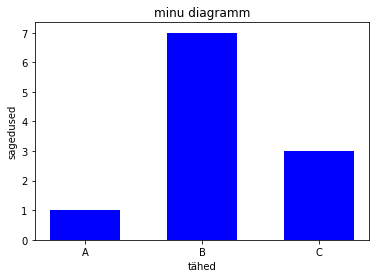

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Andmed: tulpade nimed ja vastavad arvandmed
labels = ['A', 'B', 'C']
data   = [1, 7, 3]

# tulpade "koordinaadid"
# (ehk millises järjekorras tulbad pildile 
# paigutatakse)
y_pos = range(len(labels))
# tulpdiagrammi tegemine:
plt.bar(y_pos, data, color='blue', width=0.6)
# tulpade nimed:
plt.xticks(y_pos, labels)
# diagrammi ja selle telgede nimed:
plt.title('minu diagramm')
plt.xlabel('tähed')
plt.ylabel('sagedused')

# kuvame diagrammi:
plt.show()

Mille kohta veel tasub uurida: 
 * Funktsiooni bar [dokumentatsioon](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html);
 * X- ja Y-telje nimede vormistuse muutmine, nt [xticks](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) ja [selle võimalike parameetrite loend](https://matplotlib.org/api/text_api.html#matplotlib.text.Text);
 * Pildi ja fondi suuruse [muutmine](https://matplotlib.org/users/dflt_style_changes.html#figure-size-font-size-and-screen-dpi);

---